In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("SalaryData_Train(1).csv")
#test = pd.read_csv("SalaryData_Test(1).csv")

In [3]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(30161, 14)

In [5]:
df.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
df.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
df.Salary.describe


<bound method NDFrame.describe of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object>

In [11]:
df.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [12]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [13]:
df['Salary'] = df['Salary'].apply(lambda x: 1 if x == ' <=50K' else 0)
df['sex'] = df['sex'].apply(lambda x: 1 if x == ' Male' else 0)
df['race'] = df['race'].map({' White': 1, ' Black': 2, ' Asian-Pac-Islander': 3, ' Amer-Indian-Eskimo': 4, ' Other': 5 }).astype(int)
df['relationship'] = df['relationship'].map({' Not-in-family': 1, ' Husband': 2, ' Wife': 3, ' Own-child': 4, ' Unmarried': 5,  ' Other-relative':6}).astype(int)

In [14]:
## lable encoding for biggest categorial columns
from sklearn import preprocessing
lable_encode = preprocessing.LabelEncoder()

In [15]:
df['education'] = lable_encode.fit_transform(df['education'])
df['workclass'] = lable_encode.fit_transform(df['workclass'])
df['maritalstatus'] = lable_encode.fit_transform(df['maritalstatus'])
df['occupation'] = lable_encode.fit_transform(df['occupation'])
df['native'] = lable_encode.fit_transform(df['native'])

In [16]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,1,1,2174,0,40,37,1
1,50,4,9,13,2,3,2,1,1,0,0,13,37,1
2,38,2,11,9,0,5,1,1,1,0,0,40,37,1
3,53,2,1,7,2,5,2,2,1,0,0,40,37,1
4,28,2,9,13,2,9,3,2,0,0,0,40,4,1


In [17]:
df.Salary[:5]

0    1
1    1
2    1
3    1
4    1
Name: Salary, dtype: int64

In [18]:
df.Salary.value_counts()

1    22653
0     7508
Name: Salary, dtype: int64

In [19]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,1,1,2174,0,40,37,1
1,50,4,9,13,2,3,2,1,1,0,0,13,37,1
2,38,2,11,9,0,5,1,1,1,0,0,40,37,1
3,53,2,1,7,2,5,2,2,1,0,0,40,37,1
4,28,2,9,13,2,9,3,2,0,0,0,40,4,1


In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='education'>

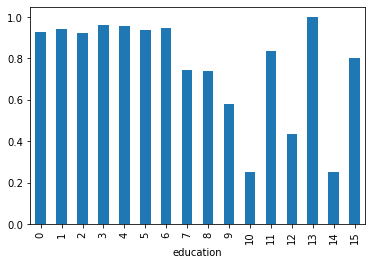

In [21]:
df.groupby('education').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

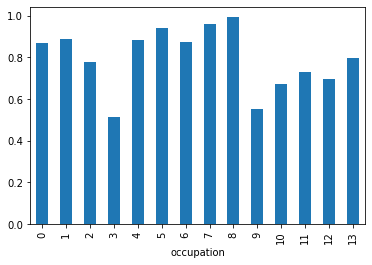

In [22]:
df.groupby('occupation').Salary.mean().plot(kind='bar')

<AxesSubplot:>

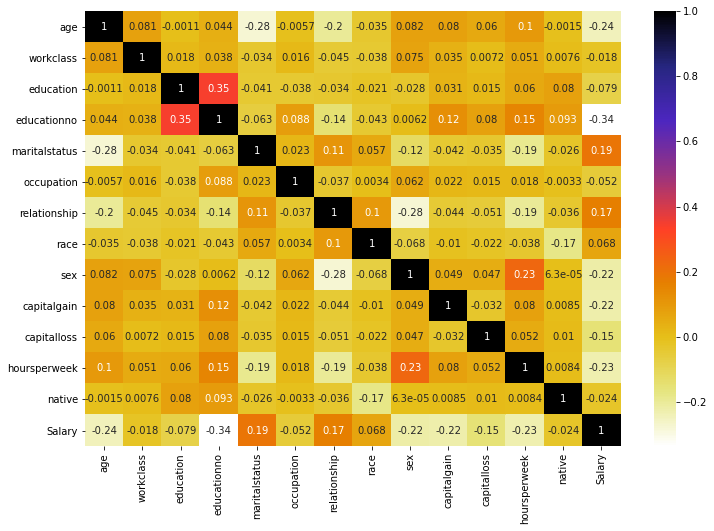

In [23]:
## Find the high correlated Values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)

In [24]:
## find the feature engineering correlation
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
         for j in range(i):
                if (corr_matrix.iloc[i,j])>threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [25]:
corr = correlation(df, 0.6)
len(corr)

0

## No highly Correlation found

In [26]:
df.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,1,1,2174,0,40,37,1
1,50,4,9,13,2,3,2,1,1,0,0,13,37,1


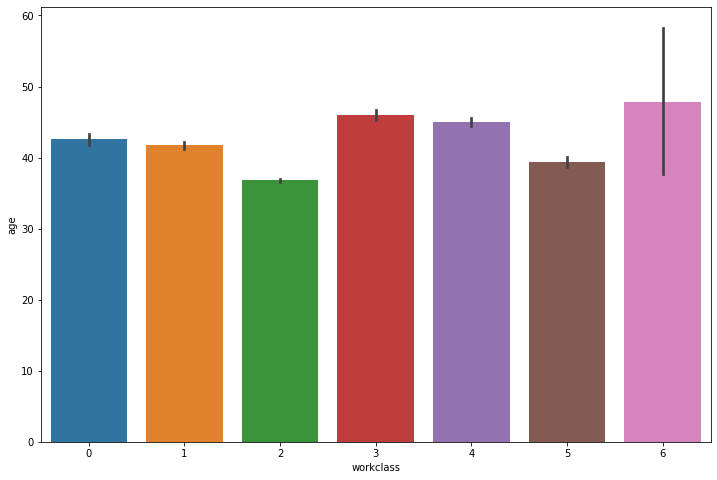

In [27]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'workclass', y = 'age', data = df)
plt.show()


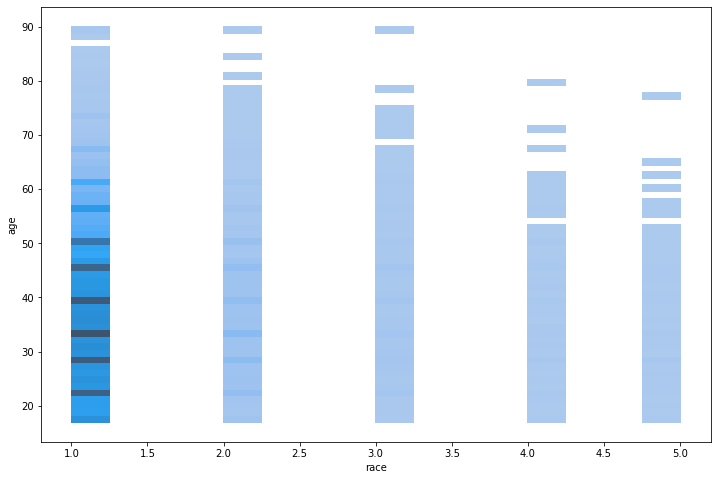

In [28]:
plt.figure(figsize = (12,8))
sns.histplot(x = 'race', y = 'age', data = df)
plt.show()


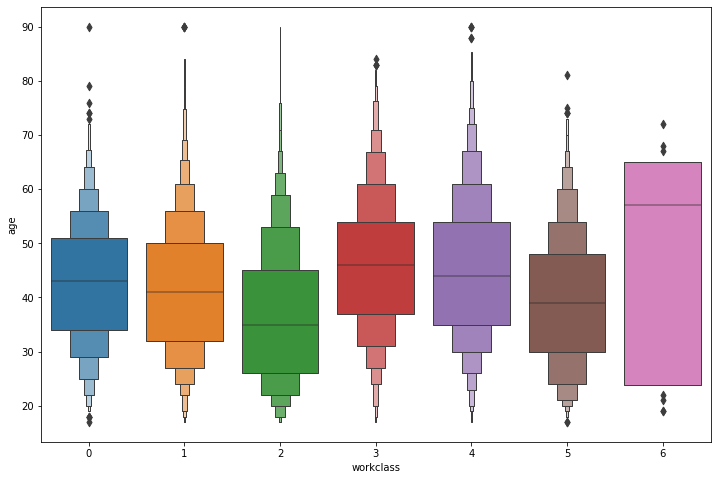

In [29]:
plt.figure(figsize = (12,8))
sns.boxenplot(x = 'workclass', y = 'age', data = df)
plt.show()


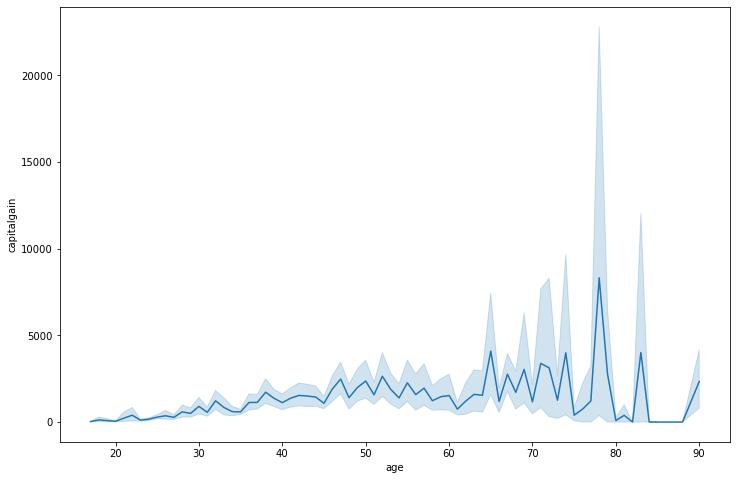

In [30]:
plt.figure(figsize = (12,8))
sns.lineplot(x ='age' , y = 'capitalgain', data = df)
plt.show()


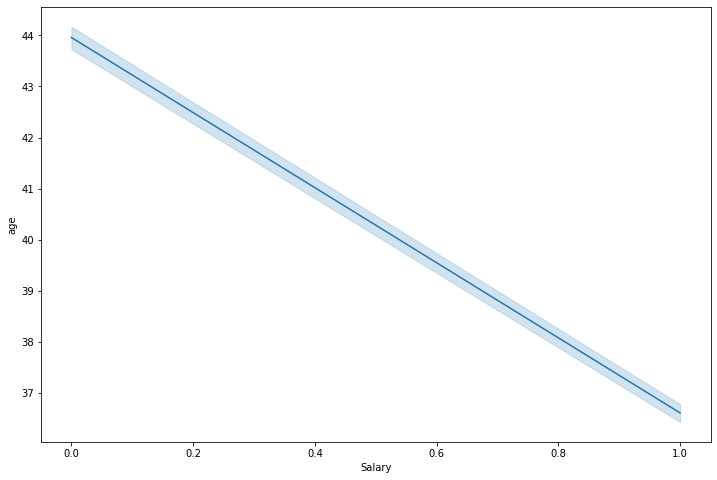

In [31]:
plt.figure(figsize = (12,8))
sns.lineplot(x ='Salary' , y = 'age', data = df)
plt.show()

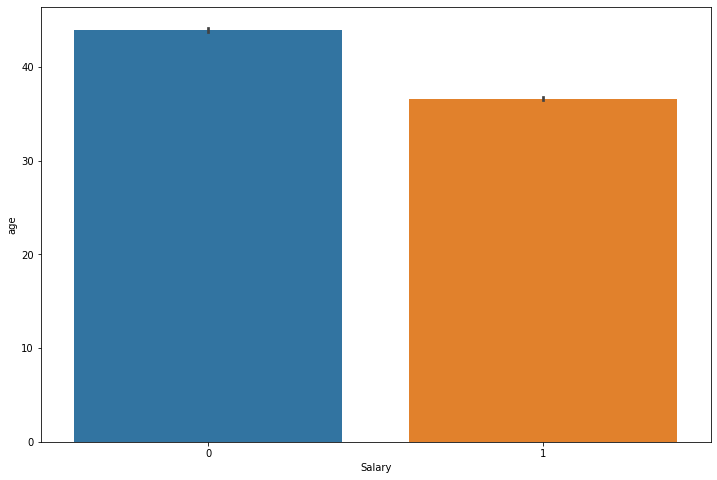

In [32]:
plt.figure(figsize = (12,8))
sns.barplot(x ='Salary' , y = 'age', data = df)
plt.show()

In [33]:
## split the data 
from sklearn.model_selection import train_test_split

In [34]:
## taking the only the feature that has important
x = df.iloc[:, :13]
y = df.iloc[:, 13]

In [35]:
x.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,1,1,2174,0,40,37
1,50,4,9,13,2,3,2,1,1,0,0,13,37


In [36]:
y.head(2)

0    1
1    1
Name: Salary, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19604, 13) (10557, 13) (19604,) (10557,)


In [39]:
##Standardization data
from sklearn.preprocessing import StandardScaler

In [40]:
std = StandardScaler()

In [41]:
col = X_train.columns
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [42]:
X_train = pd.DataFrame(X_train, columns=[col])
X_test = pd.DataFrame(X_test, columns=[col])

## build kernel = simple linear 

In [43]:
from sklearn.svm import SVC

In [44]:
model = SVC(kernel='linear', random_state = 0)

In [45]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [46]:
prid = model.predict(X_test)

In [47]:
prid

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [48]:
y_test[:5]

25338    1
18840    1
8391     0
18258    1
16669    1
Name: Salary, dtype: int64

In [49]:
## find the accuracy of the model
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test, prid)

0.8063843895045941

In [51]:
## score of the model
score = model.score(X_test, y_test)

In [52]:
score

0.8063843895045941

In [53]:
from sklearn import metrics

In [54]:
print("Accuracy score: ", metrics.accuracy_score(y_test, prid))
print("Precision_Score: ", metrics.precision_score(y_test, prid))
print("Recall score: ", metrics.recall_score(y_test, prid))
print("Classification Report: ", metrics.classification_report(y_test, prid))

Accuracy score:  0.8063843895045941
Precision_Score:  0.8114702154626109
Recall score:  0.9673885671115589
Classification Report:                precision    recall  f1-score   support

           0       0.76      0.32      0.45      2615
           1       0.81      0.97      0.88      7942

    accuracy                           0.81     10557
   macro avg       0.79      0.64      0.67     10557
weighted avg       0.80      0.81      0.77     10557



## Build kernel = Polynomial

In [55]:
poly_model = SVC(kernel='poly', random_state = 0)

In [56]:
poly_model.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [57]:
poly_prid = poly_model.predict(X_test)

In [58]:
poly_prid[:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [59]:
y_test[:10]

25338    1
18840    1
8391     0
18258    1
16669    1
19691    1
10377    0
15252    1
19978    0
1169     1
Name: Salary, dtype: int64

In [60]:
## find the accuracy of the model
from sklearn.metrics import accuracy_score

In [61]:
## score of the model
poly_score = poly_model.score(X_test, y_test)
poly_score

0.822013829686464

In [62]:
print("Accuracy score: ", metrics.accuracy_score(y_test, poly_prid))
print("Precision_Score: ", metrics.precision_score(y_test, poly_prid))
print("Recall score: ", metrics.recall_score(y_test, poly_prid))
print("Classification Report: ", metrics.classification_report(y_test, poly_prid))

Accuracy score:  0.822013829686464
Precision_Score:  0.8320008761362392
Recall score:  0.9565600604381768
Classification Report:                precision    recall  f1-score   support

           0       0.76      0.41      0.54      2615
           1       0.83      0.96      0.89      7942

    accuracy                           0.82     10557
   macro avg       0.80      0.68      0.71     10557
weighted avg       0.81      0.82      0.80     10557



## Build kernel = RBF

In [63]:
rbf_model = SVC(kernel='rbf', random_state = 0)

In [64]:
rbf_model.fit(X_train, y_train)

SVC(random_state=0)

In [65]:
rbf_prid = rbf_model.predict(X_test)

In [66]:
rbf_prid[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [67]:
y_test[:10]

25338    1
18840    1
8391     0
18258    1
16669    1
19691    1
10377    0
15252    1
19978    0
1169     1
Name: Salary, dtype: int64

In [68]:
## score of the model
rbf_score = rbf_model.score(X_test, y_test)
rbf_score

0.8428530832622905

In [69]:
print("Accuracy score: ", metrics.accuracy_score(y_test, rbf_prid))
print("Precision_Score: ", metrics.precision_score(y_test, rbf_prid))
print("Recall score: ", metrics.recall_score(y_test, rbf_prid))
print("Classification Report: ", metrics.classification_report(y_test, rbf_prid))

Accuracy score:  0.8428530832622905
Precision_Score:  0.8623832045218595
Recall score:  0.9413246033744649
Classification Report:                precision    recall  f1-score   support

           0       0.75      0.54      0.63      2615
           1       0.86      0.94      0.90      7942

    accuracy                           0.84     10557
   macro avg       0.81      0.74      0.77     10557
weighted avg       0.84      0.84      0.83     10557



## Build kernel = sigmoid

In [70]:
sigmoid_model = SVC(kernel='sigmoid', random_state = 0)

In [71]:
sigmoid_model.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [72]:
sigmoid_prid = sigmoid_model.predict(X_test)

In [73]:
sigmoid_prid[:10]

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [74]:
y_test[:10]

25338    1
18840    1
8391     0
18258    1
16669    1
19691    1
10377    0
15252    1
19978    0
1169     1
Name: Salary, dtype: int64

In [75]:
## score of the model
sigmoid_score = sigmoid_model.score(X_test, y_test)
sigmoid_score

0.7554229421237094

In [76]:
print("Accuracy score: ", metrics.accuracy_score(y_test, sigmoid_prid))
print("Precision_Score: ", metrics.precision_score(y_test, sigmoid_prid))
print("Recall score: ", metrics.recall_score(y_test, sigmoid_prid))
print("Classification Report: ", metrics.classification_report(y_test, sigmoid_prid))

Accuracy score:  0.7554229421237094
Precision_Score:  0.8400152245622938
Recall score:  0.8336691009821203
Classification Report:                precision    recall  f1-score   support

           0       0.51      0.52      0.51      2615
           1       0.84      0.83      0.84      7942

    accuracy                           0.76     10557
   macro avg       0.67      0.68      0.67     10557
weighted avg       0.76      0.76      0.76     10557

